<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/week3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/house_price_train.csv")

In [2]:
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [3]:
[col for col in df.columns if df[col].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [5]:
df['LotFrontage'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-2890836401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-2890836401.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LotFrontage'].fillna(method='ffill', inplace=True)


In [6]:
print(df['MasVnrType'].isnull().sum())

872


In [7]:
df = df.drop(columns=['MasVnrType'])


In [8]:
df = df.drop(columns=['Alley'])

In [9]:
df.fillna(method="ffill",inplace=True)
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64


/tmp/ipython-input-2268526124.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


In [10]:
[col for col in df.columns if df[col].isnull().sum()>0]

['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
df = df.drop(columns=['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [12]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [13]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']


In [14]:

X = pd.get_dummies(X,drop_first=True)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



In [16]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

5

In [17]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [18]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

20

In [19]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [20]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))


0


In [21]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

10


In [22]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

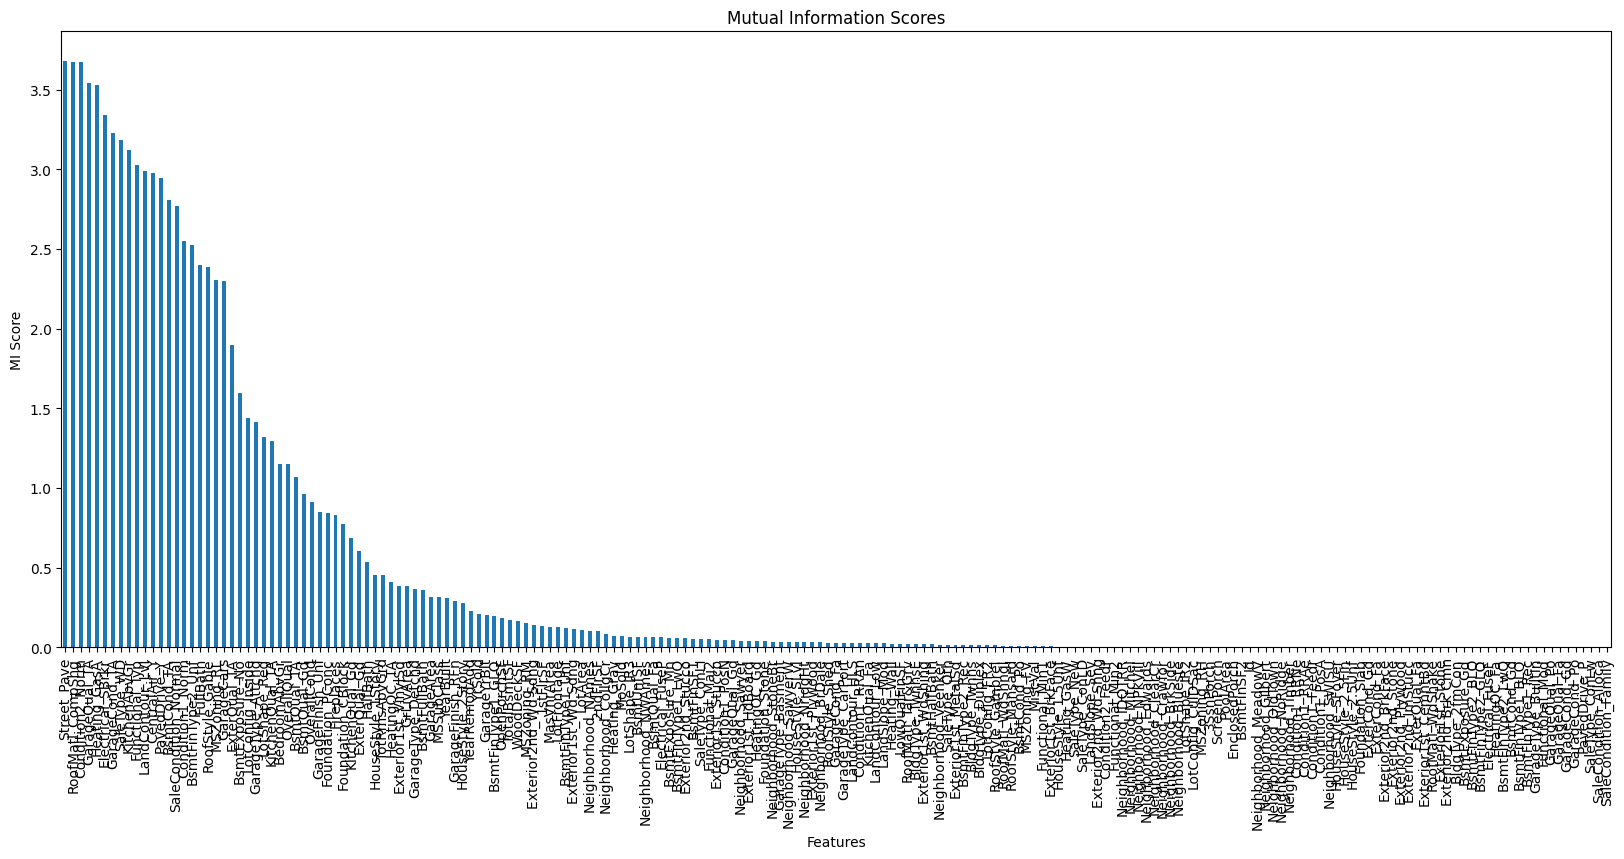

Top 10 Selected Features:
 ['KitchenAbvGr', 'Street_Pave', 'Condition2_Norm', 'RoofMatl_CompShg', 'Heating_GasA', 'CentralAir_Y', 'Functional_Typ', 'GarageQual_TA', 'GarageCond_TA', 'SaleType_WD']


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

In [24]:
#Anova f_regression
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(x_train, y_train)

top_features = x_train.columns[selector.get_support()]
print("\nTop 10 Features (f_regression):\n", top_features)

scores = pd.Series(selector.scores_, index=x_train.columns)
scores = scores.sort_values(ascending=False)
print("\nRegression Feature Scores:\n", scores.head(10))



Top 10 Features (f_regression):
 Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'ExterQual_TA',
       'KitchenQual_TA'],
      dtype='object')

Regression Feature Scores:
 OverallQual       1628.570495
GrLivArea         1131.879650
GarageCars         758.024880
GarageArea         727.175552
TotalBsmtSF        654.341155
1stFlrSF           605.576313
ExterQual_TA       499.122655
FullBath           497.954582
TotRmsAbvGrd       431.845019
KitchenQual_TA     376.161106
dtype: float64


In [ ]:
df1=pd.read_csv("/content/Santander Customer Satisfaction_train.csv")

In [ ]:
print(df1)

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
63110  126019     2     32                 0.0                      0.0   
63111  126022     2     23                 0.0                      0.0   
63112  126023     2     29                 0.0                      0.0   
63113  126024     2     23                 0.0                      0.0   
63114  126026     2     67                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                          0.0          

In [ ]:
[col for col in df1.columns if df1[col].isnull().sum()>0]

['num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_largo_ult3',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var39_vig_ult3',
 'num_meses_var44_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_comer_ult3',
 'num_op_var40_comer_ult1',
 'num_op_var40_comer_ult3',
 'num_op_var40_efect_ult1',
 'num_op_var40_efect_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var41_efect_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_reemb_var13_hace3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var17_ult1',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_sal_var16_ult1',
 'num_var43_emit_ult1',
 'num_var43_recib_ult1',
 'num_trasp_var11_ul

In [ ]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        df1[col].fillna(df1[col].median(), inplace=True)
    else:
        df1[col].fillna(df1[col].mode()[0], inplace=True)


/tmp/ipython-input-1064465167.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [ ]:
X = df1.drop('TARGET',axis=1)
y = df1['TARGET']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

49

In [ ]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)


In [ ]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

99

In [ ]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [ ]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

10


In [ ]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)

In [ ]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

104


In [ ]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

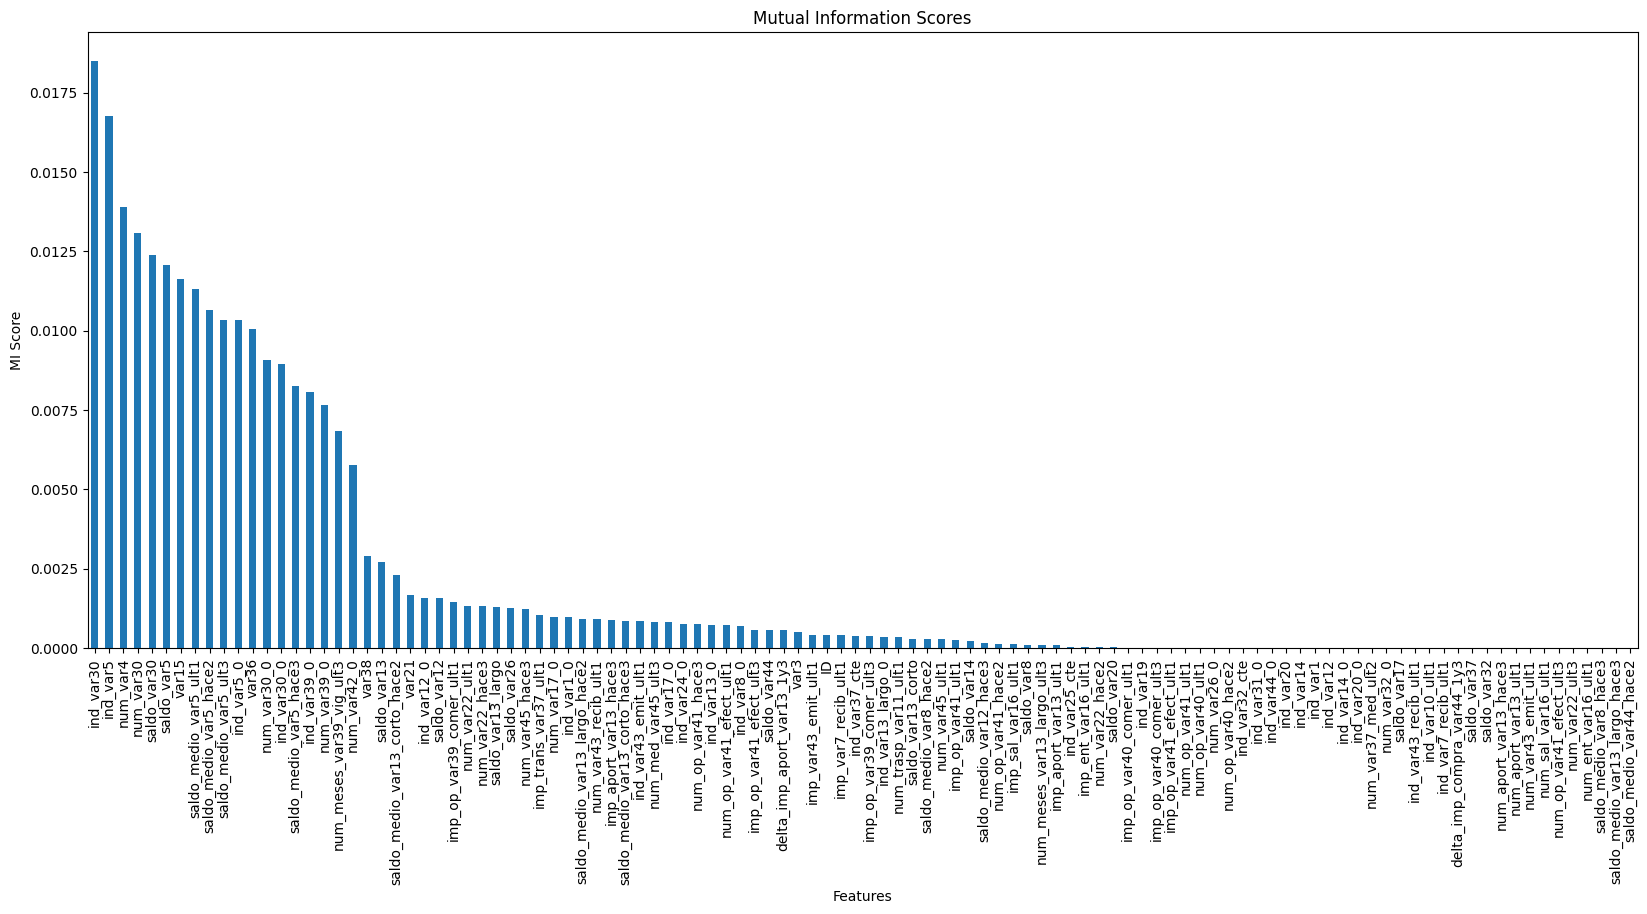

Top 10 Selected Features:
 ['var15', 'ind_var5', 'ind_var30', 'num_var4', 'num_var30', 'saldo_var5', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(x_train, y_train)

top_features = x_train.columns[anova_selector.get_support()]
print(top_features)

anova_scores = pd.Series(anova_selector.scores_, index=x_train.columns)
anova_scores = anova_scores.sort_values(ascending=False)
print(anova_scores.head(10))

Index(['var15', 'ind_var5', 'ind_var8_0', 'ind_var13_0', 'ind_var30',
       'num_var4', 'num_var30_0', 'num_var30', 'saldo_var30', 'var36'],
      dtype='object')
ind_var30      985.710086
num_var30      834.484935
ind_var5       791.252204
var36          480.672551
var15          427.063273
num_var4       311.803174
ind_var8_0      75.642376
ind_var13_0     69.462737
num_var30_0     69.320201
saldo_var30     62.777749
dtype: float64


In [25]:
import pandas as pd
df2=pd.read_csv("titanic_train.csv")
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [28]:

df2.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [29]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [31]:
df2=df2.drop('Cabin',axis=1)
df2=df2.drop('Embarked',axis=1)
df2=df2.drop('Name',axis=1)


In [32]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [33]:
X = df2.drop('Survived',axis=1)
y = df2['Survived']

In [34]:
X = pd.get_dummies(X,drop_first=True)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [36]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)


171

In [37]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [38]:

quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [39]:

dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

0


In [40]:

grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))


0


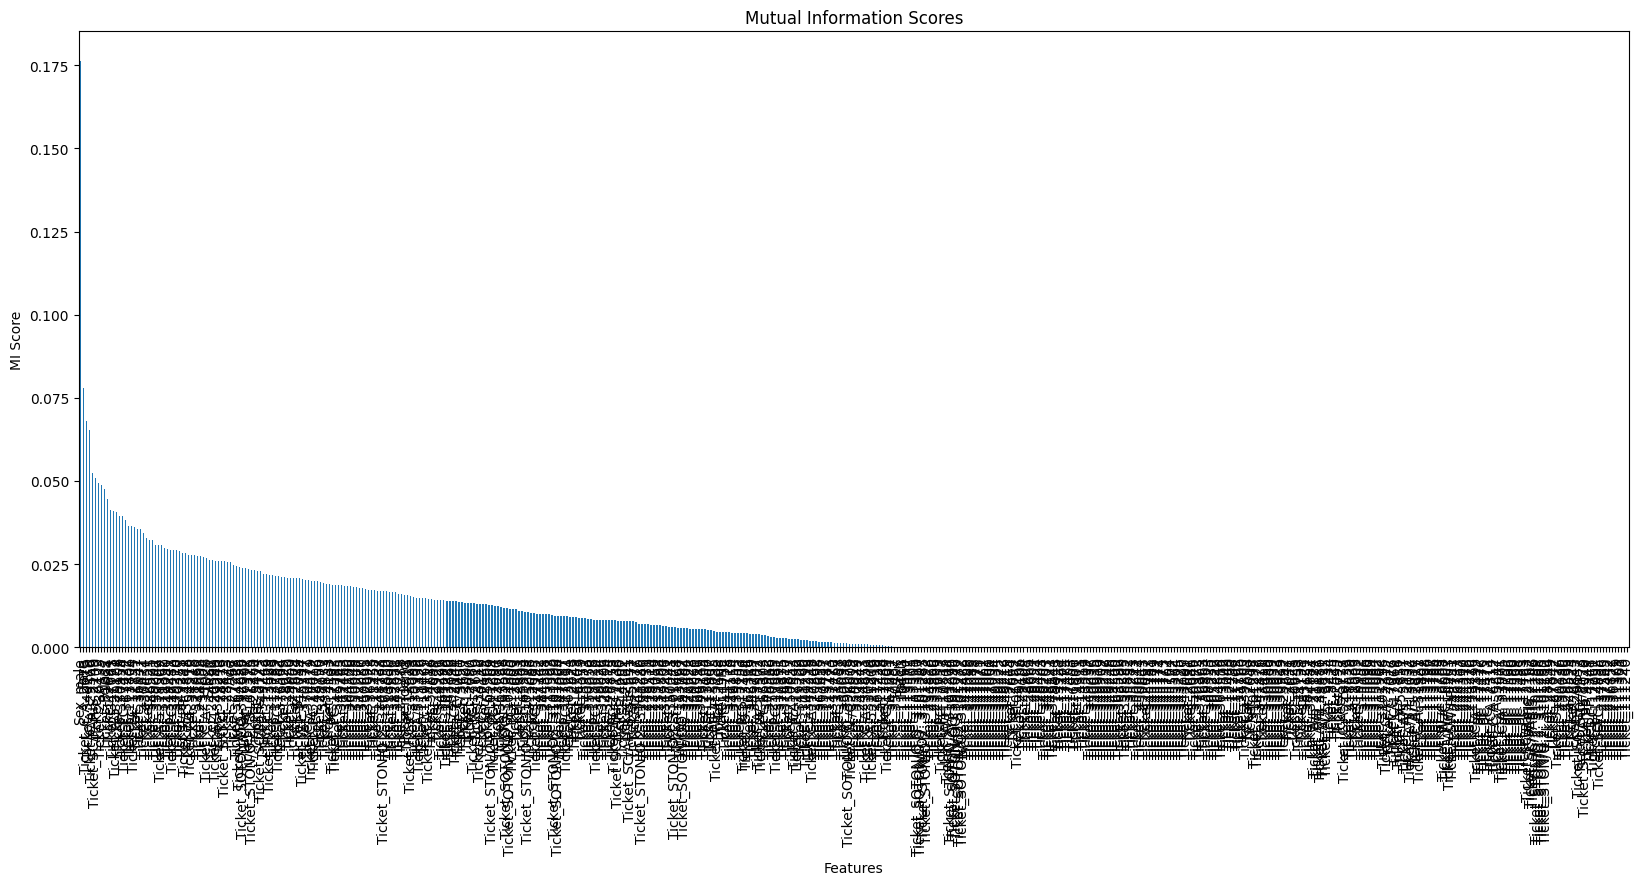

Top 10 Selected Features:
 ['Fare', 'Sex_male', 'Ticket_113796', 'Ticket_13509', 'Ticket_218629', 'Ticket_2659', 'Ticket_28425', 'Ticket_345774', 'Ticket_347078', 'Ticket_SOTON/O.Q. 3101307']


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())


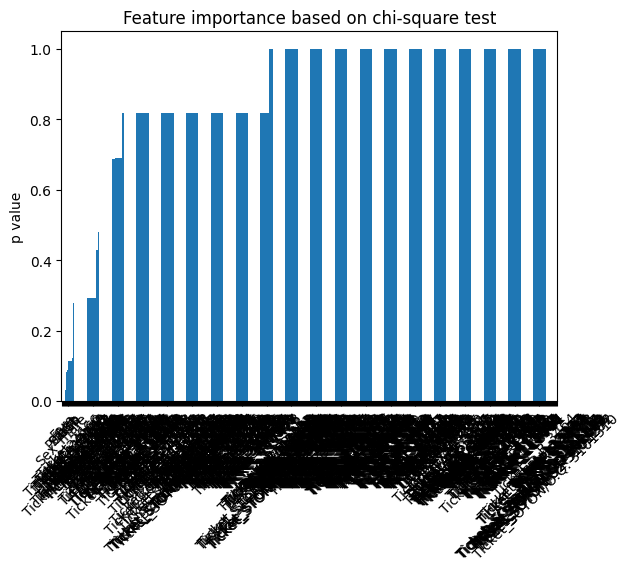

In [46]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()


In [43]:
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd

anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(x_train, y_train)

top_features = x_train.columns[anova_selector.get_support()]
print(top_features)

anova_scores = pd.Series(anova_selector.scores_, index=x_train.columns)
anova_scores = anova_scores.sort_values(ascending=False)
print(anova_scores.head(10))


Index(['Pclass', 'Fare', 'Sex_male', 'Ticket_113760', 'Ticket_24160',
       'Ticket_2666', 'Ticket_29106', 'Ticket_347082', 'Ticket_CA. 2343',
       'Ticket_PC 17755'],
      dtype='object')
Sex_male           260.604149
Pclass              78.681039
Fare                34.103369
Ticket_24160         4.767074
Ticket_113760        4.767074
Ticket_2666          4.767074
Ticket_29106         4.767074
Ticket_CA. 2343      4.514871
Ticket_347082        3.859570
Ticket_PC 17611      3.164807
dtype: float64
